# Looking at the pvlib model for comparison with pyrheliometer data

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import source.pyr_funcs as pf


In [ ]:
# get the files
dir_path = "/Users/tervin/pyr_classifier/pyr_data"
files = os.listdir(dir_path)
files = sorted(files)
files = [files[x] for x in np.arange(0, len(files), 6)]

# parse files
days, full_flux, noon_flux = pf.parse_files(files, dir_path)

In [ ]:
print(len(full_flux))
print(len(full_flux[0]))


## Build model for ideal days

In [ ]:
# default location parameters - NEID spectrometer (Kitt Peak, Tuscon AZ)
lat = 32.2
lon = -111
tz = 'US/Arizona'
elevation=735
name='Tucson'

# create TSI model
full_model, noon_model = pf.tsi_model(days, full_flux, lat, lon, tz, elevation, name)

## Calculate statisical parameters for flux data

In [ ]:
days, stat_params = pf.stat_parameters(days, full_flux, noon_flux, full_model)

# Cluster this

In [8]:
from sklearn.cluster import KMeans


[]


## Use elbow method to determine best number of clusters

In [9]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(stat_params)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Variance')
plt.title('Elbow method to determine optimal k value')
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

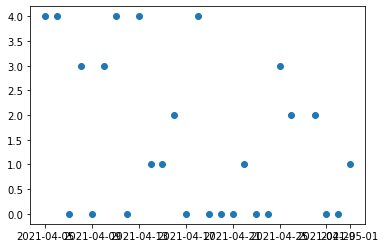

In [99]:
# X = scal_f_std.reshape(-1, 1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(stat_params)
labels = kmeans.labels_

good_labels = np.where(labels == 0)
plt.scatter(np.array(days), np.array(labels))

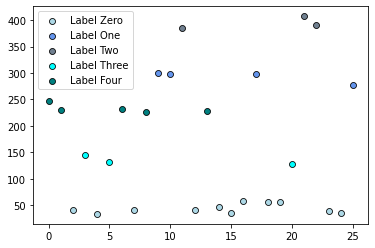

In [100]:
zero = np.where(labels == 0)
one = np.where(labels == 1)
two = np.where(labels == 2)
three = np.where(labels == 3)
four = np.where(labels == 4)
plt.scatter(x[zero], scal_f_std[zero], color='lightblue', edgecolors='k', linewidths=0.8, label='Label Zero')
plt.scatter(x[one], scal_f_std[one], color='cornflowerblue', edgecolors='k', linewidths=0.8, label='Label One')
plt.scatter(x[two], scal_f_std[two], color='slategrey', edgecolors='k', linewidths=0.8, label='Label Two')
plt.scatter(x[three], scal_f_std[three], color='cyan', edgecolors='k', linewidths=0.8, label='Label Three')
plt.scatter(x[four], scal_f_std[four], color='teal', edgecolors='k', linewidths=0.8, label='Label Four')

plt.legend()

In [ ]:
# use pickle to save and load model
import pickle

# save model
pickle.dump(model, open("model.pkl", "wb"))
# load model
model = pickle.load(open("model.pkl", "rb"))

# Compare model to my labeling

Cluster: [ 2  4  7 12 14 15 16 18 19 23 24] 
 By Eye: [ 2  4  7 12 14 15 23 24]


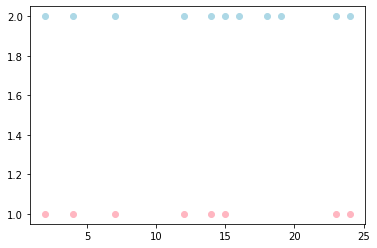

In [84]:
x = np.arange(0, len(d_std))
good_labels = np.where(labels == 0)
plt.scatter(x[good_labels], [2]*len(x[good_labels]), color='lightblue')
plt.scatter(x[good_bool], [1]*len(x[good_bool]), color='lightpink')

print('Cluster:', x[good_labels], "\n By Eye:", x[good_bool])

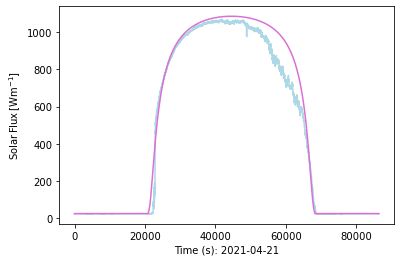

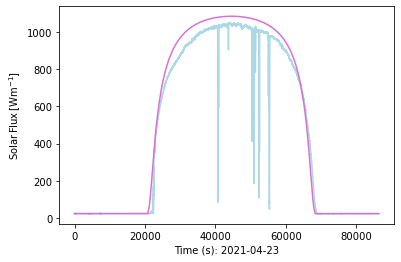

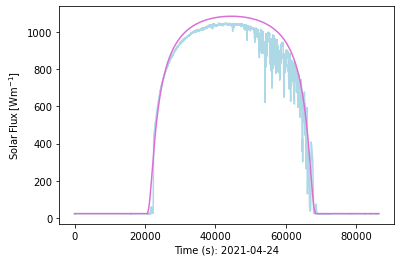

In [93]:
diff = [16, 18, 19]
for d in diff:
    plt.figure(d)
    x = np.arange(0, 86400)
    plt.plot(x, good_flux[d], color='lightblue')
    plt.plot(x, good_model[d]*1.08, color='orchid')
    plt.ylabel(r'$\rm Solar \/\rm Flux \/\rm [W m^{-1}]$')
    plt.xlabel('Time (s): ' + str(d_std[d]))

In [91]:
print(len(good_flux))

86400


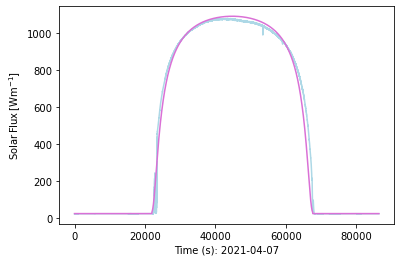

In [51]:
x = np.arange(0, 86400)
plt.plot(x, date_flux[3], color='lightblue')
plt.plot(x, date_model[3]*1.08, color='orchid')
plt.ylabel(r'$\rm Solar \/\rm Flux \/\rm [W m^{-1}]$')
plt.xlabel('Time (s): ' + str(d_std[2]))
plt.savefig('/Users/tervin/pyr_classifier/images/04_07_2021_scaled.png')

Text(0.5, 0, 'Time (s): 2021-04-09')

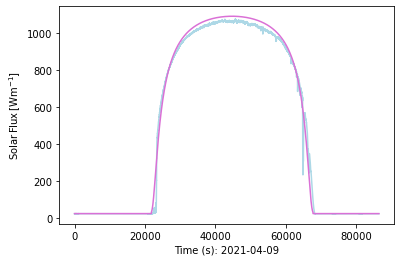

In [41]:
x = np.arange(0, 86400)
plt.plot(x, date_flux[5], color='lightblue')
plt.plot(x, date_model[5]*1.08, color='orchid')
plt.ylabel(r'$\rm Solar \/\rm Flux \/\rm [W m^{-1}]$')
plt.xlabel('Time (s): ' + str(d_std[4]))
# plt.savefig('/Users/tervin/pyr_classifier/images/04_06_2021_scaled.png')


# Development: Parsing and Model

In [ ]:
dates, flux, voltage = [], [], []
for fl in files:
    file = os.path.join("/Users/tervin/pyr_classifier/pyr_data", fl)
    d, f, v = pf.read_pyr(file)
    dates.append(d)
    flux.append(f)
    voltage.append(v)

In [ ]:
# we want this separate so we can get the data for days that are half in one file
# and half in another
# flatten the lists
use_dates = [item for sublist in dates for item in sublist]
use_flux = [item for sublist in flux for item in sublist]
use_flux = np.array(use_flux)
days, date_flux, sol_flux = pf.parse_dates(use_dates, use_flux)


In [ ]:
# create the model for each of these days
# add the models to a list
# calculate residual of model for date flux and solar flux and plot over time


#### for many days
from pvlib import pvsystem, location, clearsky
import pandas as pd

# plot for comparison
class DualAxisTrackerMount(pvsystem.AbstractMount):
    def get_orientation(self, solar_zenith, solar_azimuth):
        # no rotation limits, no backtracking
        return {'surface_tilt': solar_zenith, 'surface_azimuth': solar_azimuth}

lat = 32.2
lon = -111
loc = location.Location(lat, lon, 'US/Arizona', 700, 'Tucson')

In [ ]:
date_model, sol_model = [], []

for i, d in enumerate(days):
    times = pd.date_range(start=d, end=d + timedelta(days=1), freq='1S', tz=loc.tz)
    # get turbidity
    turbidity = clearsky.lookup_linke_turbidity(times, lat, lon, interp_turbidity=False)
    weather = loc.get_clearsky(times, linke_turbidity=turbidity)
    times_list = []
    for d in times:
        times_list.append(d.time())
    mod = weather.dni.values + np.min(full_flux[i])
    times_comp = np.array(times_list)
    t_use = np.logical_and(times_comp >= time(hour=9, minute=30), times_comp < time(hour=15, minute=30))
    date_model.append(mod[:-1])
    sol_model.append(mod[t_use])

# Development: Statistical Parameters

In [ ]:
good_days = [date(year=2021, month=4, day=7),date(year=2021, month=4, day=12),date(year=2021, month=4, day=17),
             date(year=2021, month=4, day=19),date(year=2021, month=4, day=20),date(year=2021, month=4, day=29),
             date(year=2021, month=4, day=30), date(year=2021, month=4, day=9)]

In [ ]:
# calculate the residual and standard deviation
f_std, s_std, d_std = [], [], []
for i, d in enumerate(days):
    if len(date_flux[i]) == len(date_model[i]):
        f_res = date_flux[i] - date_model[i]
        s_res = sol_flux[i] - sol_model[i]
        f_std.append(np.std(f_res))
        s_std.append(np.std(s_res))
        d_std.append(d)
    else:
        pass
f_std = np.array(f_std)
s_std = np.array(s_std)
good_bool = np.isin(d_std, good_days)



In [ ]:
# plotting this stuff
x = np.arange(0, len(d_std))
plt.scatter(x[good_bool], f_std[good_bool], color='lightblue', edgecolors='k', linewidths=0.8, label='Residual Std: Full Day - Good')
plt.scatter(x[good_bool], s_std[good_bool], color='lightpink', edgecolors='k', linewidths=0.8, label='Residual Std: Solar Noon - Good')
plt.scatter(x[~good_bool], f_std[~good_bool], color='cornflowerblue', edgecolors='k', linewidths=0.8, label='Residual Std: Full Day - Bad')
plt.scatter(x[~good_bool], s_std[~good_bool], color='purple', edgecolors='k', linewidths=0.8, label='Residual Std: Solar Noon - Bad')

plt.legend()
plt.xlabel('Days since April 5')
plt.title('Residual Standard Deviation')
plt.ylabel(r'$\rm Solar \/\rm Flux \/\rm [W m^{-1}]$')
plt.savefig('/Users/tervin/pyr_classifier/images/residual_std.png')

In [ ]:
# looking at division
div, div_std = [], []
for i, d in enumerate(days):
    if len(date_flux[i]) == len(date_model[i]):
        divn = date_flux[i] / date_model[i]
        div.append(np.mean(divn))
        div_std.append(np.std(divn))

div = np.array(div)
div_std = np.array(div_std)

In [ ]:
x = np.arange(0, len(d_std))
plt.scatter(x[good_bool], div[good_bool], color='lightblue', edgecolors='k', linewidths=0.8, label='Division Mean: Full Day - Good')
plt.scatter(x[good_bool], div_std[good_bool], color='lightpink', edgecolors='k', linewidths=0.8, label='Division Std: Full Day - Good')
plt.scatter(x[~good_bool], div[~good_bool], color='cornflowerblue', edgecolors='k', linewidths=0.8, label='Division Mean: Full Day - Bad')
plt.scatter(x[~good_bool], div_std[~good_bool], color='thistle', edgecolors='k', linewidths=0.8, label='Division Std: Full Day - Bad')

plt.legend()
plt.xlabel('Days since April 5')
plt.ylabel(r'$\rm Solar \/\rm Flux \/\rm [W m^{-1}]$')
plt.title('Average good factor: ' + str(np.mean(div[good_bool])))
plt.savefig('/Users/tervin/pyr_classifier/images/division_std.png')


In [ ]:
# get actual standard deviation of flux array
full, noon, day_full = [], [], []
for i, d in enumerate(days):
    if len(date_flux[i]) == len(date_model[i]):
        full.append(np.std(date_flux[i]))
        noon.append(np.std(sol_flux[i]))
        day_full.append(d)
    else:
        pass
full = np.array(full)
noon = np.array(noon)

In [ ]:
# plotting this stuff
x = np.arange(0, len(d_std))
plt.scatter(x[good_bool], full[good_bool], color='lightblue', edgecolors='k', linewidths=0.8, label='Std: Full Day - Good')
plt.scatter(x[good_bool], noon[good_bool], color='lightpink', edgecolors='k', linewidths=0.8, label='Std: Solar Noon - Good')
plt.scatter(x[~good_bool], full[~good_bool], color='cornflowerblue', edgecolors='k', linewidths=0.8, label='Std: Full Day - Bad')
plt.scatter(x[~good_bool], noon[~good_bool], color='purple', edgecolors='k', linewidths=0.8, label='Std: Solar Noon - Bad')

plt.legend()
plt.xlabel('Days since April 5')
plt.ylabel(r'$\rm Solar \/\rm Flux \/\rm [W m^{-1}]$')
plt.savefig('/Users/tervin/pyr_classifier/images/std.png')


In [ ]:
# scaled residual standard deviation
scal_f_std, scal_s_std, d_std, good_flux, good_model = [], [], [], [], []
for i, d in enumerate(days):
    if len(date_flux[i]) == len(date_model[i]):
        good_flux.append(date_flux[i])
        good_model.append(date_model[i])
        f_res = date_flux[i] - (date_model[i]*1.08)
        s_res = sol_flux[i] - (sol_model[i]*1.08)
        scal_f_std.append(np.std(f_res))
        scal_s_std.append(np.std(s_res))
        d_std.append(d)
    else:
        pass
scal_f_std = np.array(scal_f_std)
scal_s_std = np.array(scal_s_std)

In [ ]:
# plotting this stuff
x = np.arange(0, len(d_std))
plt.scatter(x[good_bool], scal_f_std[good_bool], color='lightblue', edgecolors='k', linewidths=0.8, label='Residual Std: Full Day - Good')
plt.scatter(x[good_bool], scal_s_std[good_bool], color='lightpink', edgecolors='k', linewidths=0.8, label='Residual Std: Solar Noon - Good')
plt.scatter(x[~good_bool], scal_f_std[~good_bool], color='cornflowerblue', edgecolors='k', linewidths=0.8, label='Residual Std: Full Day - Bad')
plt.scatter(x[~good_bool], scal_s_std[~good_bool], color='purple', edgecolors='k', linewidths=0.8, label='Residual Std: Solar Noon - Bad')

plt.legend()
plt.xlabel('Days since April 5')
plt.ylabel(r'$\rm Solar \/\rm Flux \/\rm [W m^{-1}]$')
plt.title('Scaled Residual Standard Deviation')
plt.savefig('/Users/tervin/pyr_classifier/images/scaled_residual_std.png')

In [ ]:
print("Max of good days:", np.max(scal_f_std[good_bool]))
print("Min of bad days:", np.min(scal_f_std[~good_bool]))
print('Cutoff value at 50')

# TESTING

In [ ]:
print(len(sol_model[4]))

In [ ]:
np.where(times_comp == time(hour=15, minute=30))

In [ ]:

dates_list = []
times_list = []
for d in use_dates:
    dates_list.append(d.date())
    times_list.append(d.time())

unique_days = np.unique(dates_list)
unique_days = sorted(unique_days)
date_flux = []
sol_flux = []
for i, d in enumerate(unique_days):
    d_use = np.isin(dates_list, d)
    d_times = np.array(times_list)[d_use]
    # d_flux = flux[d_use]

In [ ]:
d_use = np.isin(dates_list, d)
d_times = np.array(times_list)[d_use]

times = pd.date_range(start=d, end=d + timedelta(days=1), freq='1S', tz=loc.tz)
mod_times = []
for d in times:
    mod_times.append(d.time())


In [ ]:
print(len(d_times))
print(len(mod_times))

In [ ]:
times_comp = np.array(mod_times)
t_use = np.logical_and(d_times > time(hour=9, minute=30), d_times < time(hour=15, minute=30))
mod_use = np.logical_and(times_comp >= time(hour=9, minute=30), times_comp < time(hour=15, minute=30))
